## 读取数据

In [39]:
##加载包
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None
#设置中文显示
import matplotlib
matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋
plt.rcParams['axes.unicode_minus']=False 
#忽略警告
import warnings
warnings.filterwarnings("ignore")

In [40]:
train=pd.read_csv("Training cohort.csv",index_col=0)
valid=pd.read_csv("Validation cohort.csv",index_col=0)
train['label']=train['Survival_Months'].map(lambda x:1 if x>=3*12 else 0)
valid['label']=valid['Survival_Months'].map(lambda x:1 if x>=3*12 else 0)

In [41]:
test=pd.read_excel('肾癌生存外部.xlsx')
test['label']=test['Survival months'].map(lambda x:1 if x>=3*12 else 0)

In [42]:
train.shape,valid.shape,test.shape

((1193, 30), (296, 30), (53, 27))

In [43]:
col='Age+Sex+Primary_Site+Grade+Histology+Marital_Status+T+N+Surgery+Radiation_Recode+Chemotherapy+Brain_Metastasis+Liver_Metastasis+Lung_Metastasis+Laterality+Tumor_Size'
f_top=col.split('+')
f_top

['Age',
 'Sex',
 'Primary_Site',
 'Grade',
 'Histology',
 'Marital_Status',
 'T',
 'N',
 'Surgery',
 'Radiation_Recode',
 'Chemotherapy',
 'Brain_Metastasis',
 'Liver_Metastasis',
 'Lung_Metastasis',
 'Laterality',
 'Tumor_Size']

In [44]:
train['TNM']=train['T']+train['N']+train['M']
train['TNM']=train['TNM'].max()-train['TNM']
valid['TNM']=valid['T']+valid['N']+valid['M']
valid['TNM']=valid['TNM'].max()-valid['TNM']
test['TNM']=test['T']+test['N']+test['M']
test['TNM']=test['TNM'].max()-test['TNM']

<AxesSubplot:title={'center':'test'}, ylabel='label'>

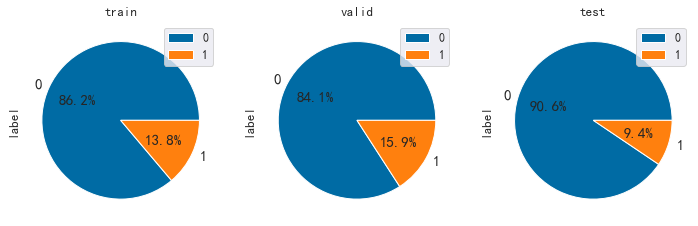

In [45]:
fig = plt.gcf() # gcf: get current figure调整图形大小
fig.set_size_inches(12,6)
plt.subplot(1,3,1)
train['label'].value_counts().plot.pie(title='train',fontsize=15,legend=True,autopct=lambda v: "{:0.1f}%".format(v))
plt.subplot(1,3,2)
valid['label'].value_counts().plot.pie(title='valid',fontsize=15,legend=True,autopct=lambda v: "{:0.1f}%".format(v))
plt.subplot(1,3,3)
test['label'].value_counts().plot.pie(title='test',fontsize=15,legend=True,autopct=lambda v: "{:0.1f}%".format(v))

## 相关性图

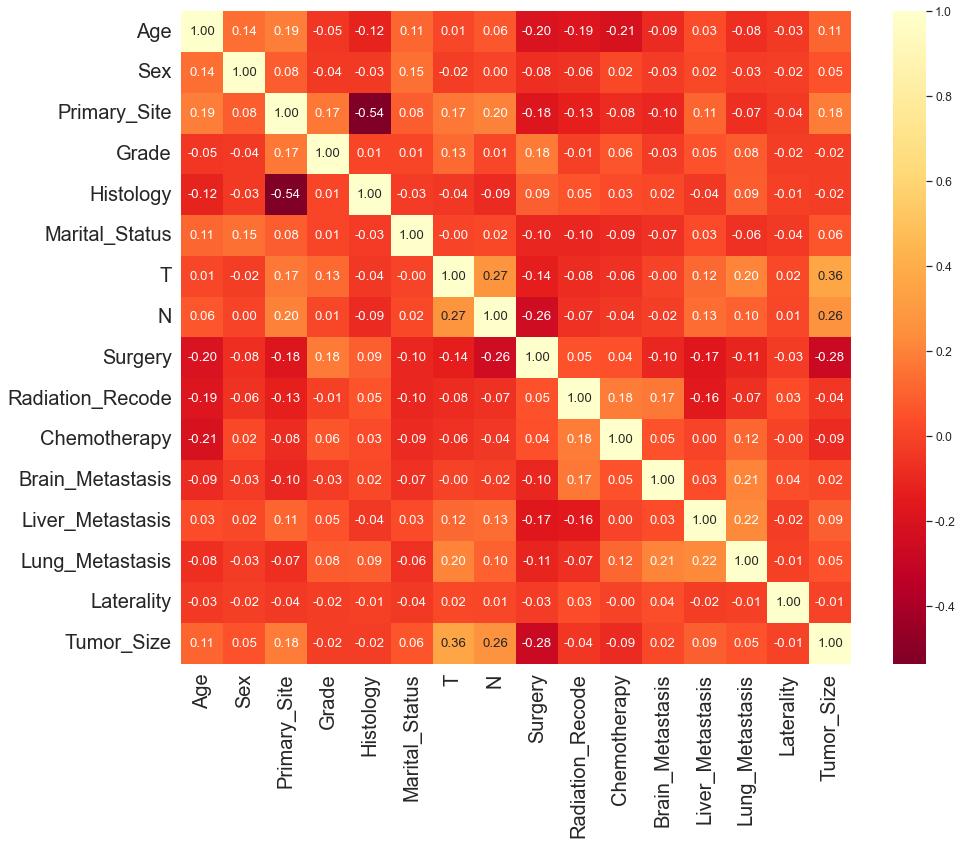

In [46]:
import palettable
sns.set(font_scale=1.1)
# plt.rc('font',family='SimHei',size=12)
fig = plt.gcf() # gcf: get current figure调整图形大小
fig.set_size_inches(15,12)
sns.heatmap(data=train[f_top].corr(),
            vmax=1, 
            cmap='YlOrRd_r',
            annot=True,
            fmt=".2f",
           )
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20,rotation=0)
plt.savefig('相关性1.png',dpi=600,bbox_inches = 'tight')

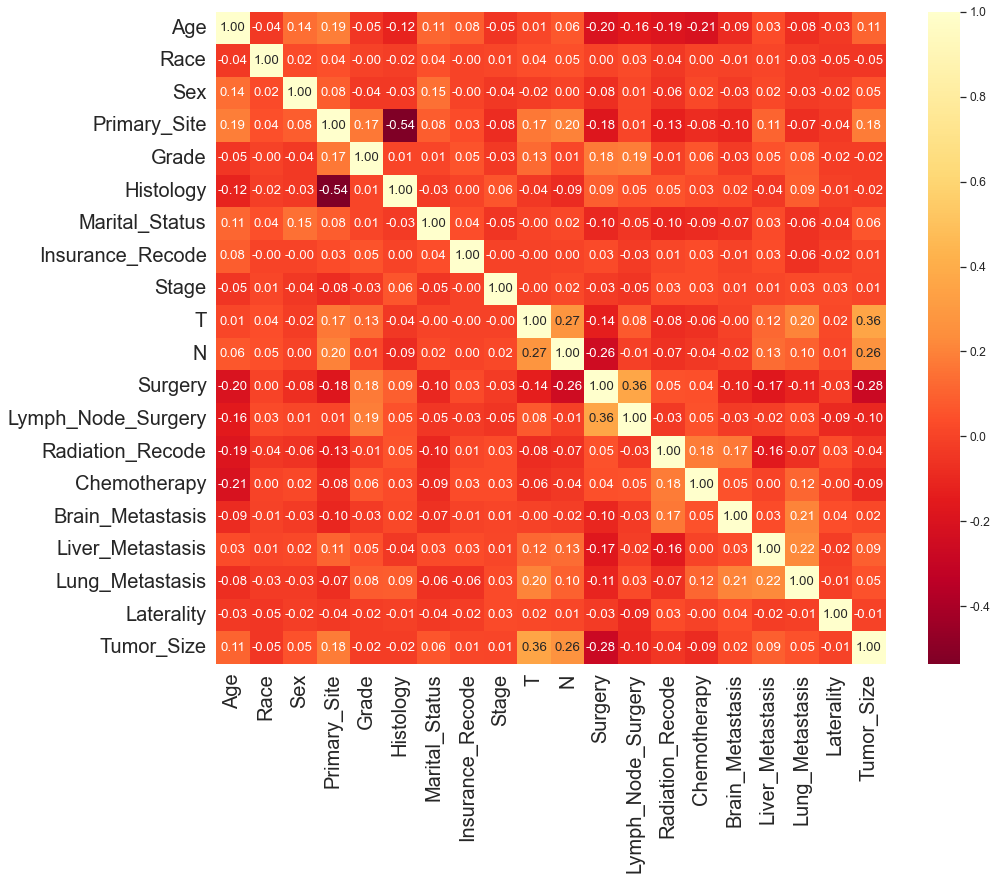

In [47]:
col='Age+Race+Sex+Primary_Site+Grade+Histology+Marital_Status+Insurance_Recode+Stage+T+N+Surgery+Lymph_Node_Surgery+Radiation_Recode+Chemotherapy+Brain_Metastasis+Liver_Metastasis+Lung_Metastasis+Laterality+Tumor_Size'
import palettable
sns.set(font_scale=1.1)
# plt.rc('font',family='SimHei',size=12)
fig = plt.gcf() # gcf: get current figure调整图形大小
fig.set_size_inches(15,12)
sns.heatmap(data=train[col.split('+')].corr(),
            vmax=1, 
            cmap='YlOrRd_r',
            annot=True,
            fmt=".2f",
           )
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20,rotation=0)
plt.savefig('相关性2.png',dpi=600,bbox_inches = 'tight')

## 模型训练

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [49]:
lr = LogisticRegression(penalty='l2',random_state =1,C=0.02)
# lr = LogisticRegression(penalty='l2',class_weight='balanced',random_state =2,C=2)
lr.fit(train[f_top],train['label'])
print("LR train auc: ",metrics.roc_auc_score(train['label'],lr.predict_proba(train[f_top])[:,1]))
print("LR valid auc: ",metrics.roc_auc_score(valid['label'],lr.predict_proba(valid[f_top])[:,1]))
print("LR test auc: ",metrics.roc_auc_score(test['label'],lr.predict_proba(test[f_top])[:,1]))

LR train auc:  0.827054592618795
LR valid auc:  0.7891993505938648
LR test auc:  0.8416666666666668


In [50]:
rf = RandomForestClassifier(n_estimators=7,max_depth=1,random_state =5)
rf.fit(train[f_top],train['label'])
print("RF train auc: ",metrics.roc_auc_score(train['label'],rf.predict_proba(train[f_top])[:,1]))
print("RF valid auc: ",metrics.roc_auc_score(valid['label'],rf.predict_proba(valid[f_top])[:,1]))
print("RF test auc: ",metrics.roc_auc_score(test['label'],rf.predict_proba(test[f_top])[:,1]))

RF train auc:  0.7814202334630351
RF valid auc:  0.7834743228232076
RF test auc:  0.8583333333333334


In [51]:
DecisionTree= DecisionTreeClassifier(max_depth = 2,criterion='gini',
                             min_samples_leaf=2,min_samples_split=2,random_state = 1)
DecisionTree.fit(train[f_top],train['label'])
print("DT train auc: ",metrics.roc_auc_score(train['label'],DecisionTree.predict_proba(train[f_top])[:,1]))
print("DT valid auc: ",metrics.roc_auc_score(valid['label'],DecisionTree.predict_proba(valid[f_top])[:,1]))
print("DT test auc: ",metrics.roc_auc_score(test['label'],DecisionTree.predict_proba(test[f_top])[:,1]))

DT train auc:  0.7554740007074638
DT valid auc:  0.7141758523455525
DT test auc:  0.8229166666666666


In [52]:
mlp=MLPClassifier(random_state = 1,hidden_layer_sizes=4)
mlp.fit(train[f_top],train['label'])
print("MLP train auc: ",metrics.roc_auc_score(train['label'],mlp.predict_proba(train[f_top])[:,1]))
print("MLP valid auc: ",metrics.roc_auc_score(valid['label'],mlp.predict_proba(valid[f_top])[:,1]))
print("MLP test auc: ",metrics.roc_auc_score(test['label'],mlp.predict_proba(test[f_top])[:,1]))

MLP train auc:  0.8196026411979719
MLP valid auc:  0.7894984192087499
MLP test auc:  0.8541666666666666


In [53]:
svm=SVC(random_state = 1,C=1,probability=True,kernel="linear")
svm.fit(train[f_top],train['label'])
print("svm train auc: ",metrics.roc_auc_score(train['label'],svm.predict_proba(train[f_top])[:,1]))
print("svm valid auc: ",metrics.roc_auc_score(valid['label'],svm.predict_proba(valid[f_top])[:,1]))
print("svm test auc: ",metrics.roc_auc_score(test['label'],svm.predict_proba(test[f_top])[:,1]))

svm train auc:  0.822338167668907
svm valid auc:  0.8009057506622234
svm test auc:  0.8291666666666667


In [54]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train[f_top],train['label'])
print("knn train auc: ",metrics.roc_auc_score(train['label'],knn.predict_proba(train[f_top])[:,1]))
print("knn valid auc: ",metrics.roc_auc_score(valid['label'],knn.predict_proba(valid[f_top])[:,1]))
print("knn test auc: ",metrics.roc_auc_score(test['label'],knn.predict_proba(test[f_top])[:,1]))

knn train auc:  0.7649304327319892
knn valid auc:  0.6899512945398616
knn test auc:  0.6229166666666666


In [55]:
BNB= BernoulliNB()
BNB.fit(train[f_top],train['label'])
print("NBC train auc: ",metrics.roc_auc_score(train['label'],BNB.predict_proba(train[f_top])[:,1]))
print("NBC valid auc: ",metrics.roc_auc_score(valid['label'],BNB.predict_proba(valid[f_top])[:,1]))
print("NBC test auc: ",metrics.roc_auc_score(test['label'],BNB.predict_proba(test[f_top])[:,1]))

NBC train auc:  0.805028888102818
NBC valid auc:  0.7722378877210971
NBC test auc:  0.8750000000000001


In [56]:
xgb = XGBClassifier(
                booster='gbtree',
                objective='binary:logistic',eval_metric=['auc'],
                max_depth=1,
                n_estimators=300,#300
                min_child_weight=1,
                learning_rate=0.3,
                random_state=0,
                gamma=0.9,
                reg_lambda=0.1,
                reg_alpha=0.1,
                scale_pos_weight=1,
                subsample=1,
                colsample_bytree=0.3,
                seed=1,
                n_jobs=-1,
                )
xgb.fit(train[f_top],train['label'])
print("XGB train auc: ",metrics.roc_auc_score(train['label'],xgb.predict_proba(train[f_top])[:,1]))
print("XGB valid auc: ",metrics.roc_auc_score(valid['label'],xgb.predict_proba(valid[f_top])[:,1]))
print("XGB test auc: ",metrics.roc_auc_score(test['label'],xgb.predict_proba(test[f_top])[:,1]))

XGB train auc:  0.8685620799434028
XGB valid auc:  0.8267965478937025
XGB test auc:  0.9125000000000001


In [57]:
# https://blog.csdn.net/weixin_48710211/article/details/122449132
def bootstrap_auc(y, pred, classes, bootstraps = 1000, fold_size = 10000):
    statistics = np.zeros((len(classes), bootstraps))

    for c in range(len(classes)):
        df = pd.DataFrame(columns=['y', 'pred'])
        # df.
        df.loc[:, 'y'] = y
        df.loc[:, 'pred'] = pred
        df_pos = df[df.y == 1]
        df_neg = df[df.y == 0]
        prevalence = len(df_pos) / len(df)
        for i in range(bootstraps):
            pos_sample = df_pos.sample(n = int(fold_size * prevalence), replace=True)
            neg_sample = df_neg.sample(n = int(fold_size * (1-prevalence)), replace=True)

            y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
            pred_sample = np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
            score = metrics.roc_auc_score(y_sample, pred_sample)
            statistics[c][i] = score
    return statistics
# print("均值:",np.mean(statistics,axis=1))
# print("最大值:",np.max(statistics,axis=1))
# print("最小值:",np.min(statistics,axis=1))
# train-训练
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    statistics = bootstrap_auc(train['label'],model.predict_proba(train[f_top])[:,1],[0,1])
    print(name+"-OR (95% CI):",round(np.mean(statistics,axis=1)[1],4),'(',round(np.min(statistics,axis=1)[1],4),'-',round(np.max(statistics,axis=1)[1],4),')')

xgb-OR (95% CI): 0.8685 ( 0.8499 - 0.8824 )
dt-OR (95% CI): 0.7556 ( 0.7373 - 0.7733 )
rf-OR (95% CI): 0.7814 ( 0.758 - 0.8033 )
lr-OR (95% CI): 0.8275 ( 0.809 - 0.8475 )
mlp-OR (95% CI): 0.8196 ( 0.7988 - 0.8361 )
nbc-OR (95% CI): 0.8053 ( 0.7861 - 0.8209 )
svm-OR (95% CI): 0.8226 ( 0.8043 - 0.8414 )
knn-OR (95% CI): 0.765 ( 0.7439 - 0.783 )


In [58]:
# valid-内部验证
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    statistics = bootstrap_auc(valid['label'],model.predict_proba(valid[f_top])[:,1],[0,1])
    print(name+"-OR (95% CI):",round(np.mean(statistics,axis=1)[1],4),'(',round(np.min(statistics,axis=1)[1],4),'-',round(np.max(statistics,axis=1)[1],4),')')

xgb-OR (95% CI): 0.8269 ( 0.8083 - 0.8425 )
dt-OR (95% CI): 0.7143 ( 0.6923 - 0.7311 )
rf-OR (95% CI): 0.7837 ( 0.766 - 0.8096 )
lr-OR (95% CI): 0.7892 ( 0.7701 - 0.8096 )
mlp-OR (95% CI): 0.7892 ( 0.771 - 0.8079 )
nbc-OR (95% CI): 0.772 ( 0.7512 - 0.7932 )
svm-OR (95% CI): 0.8011 ( 0.7856 - 0.8178 )
knn-OR (95% CI): 0.6898 ( 0.6682 - 0.7142 )


In [59]:
# test-外部验证
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    statistics = bootstrap_auc(test['label'],model.predict_proba(test[f_top])[:,1],[0,1])
    print(name+"-OR (95% CI):",round(np.mean(statistics,axis=1)[1],4),'(',round(np.min(statistics,axis=1)[1],4),'-',round(np.max(statistics,axis=1)[1],4),')')

xgb-OR (95% CI): 0.9123 ( 0.8979 - 0.9261 )
dt-OR (95% CI): 0.8229 ( 0.8063 - 0.8374 )
rf-OR (95% CI): 0.8583 ( 0.8399 - 0.877 )
lr-OR (95% CI): 0.8416 ( 0.8213 - 0.8614 )
mlp-OR (95% CI): 0.8542 ( 0.8307 - 0.8722 )
nbc-OR (95% CI): 0.8751 ( 0.8549 - 0.8912 )
svm-OR (95% CI): 0.8294 ( 0.8017 - 0.8594 )
knn-OR (95% CI): 0.6226 ( 0.5982 - 0.6537 )


In [60]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [61]:
from sklearn.metrics import brier_score_loss as BS
# train-训练
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    print(name,'brier_score',BS(train['label'],model.predict_proba(train[f_top])[:,1],pos_label = 1))

xgb brier_score 0.08857696709202176
dt brier_score 0.10384408332626364
rf brier_score 0.11034747166665039
lr brier_score 0.09728145884102735
mlp brier_score 0.10455287236751908
nbc brier_score 0.10413572678148157
svm brier_score 0.0971175316936686
knn brier_score 0.10730662196144174


In [62]:
# valid-内部验证
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    print(name,'brier_score',BS(valid['label'],model.predict_proba(valid[f_top])[:,1],pos_label = 1))

xgb brier_score 0.10753530204587172
dt brier_score 0.12006942277198646
rf brier_score 0.12397365079590737
lr brier_score 0.11388390815057664
mlp brier_score 0.12077072375160776
nbc brier_score 0.11523759880647261
svm brier_score 0.11366223578093063
knn brier_score 0.12532162162162164


In [63]:
# test-外部验证
for model,name in zip([xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn],['xgb','dt','rf','lr','mlp','nbc','svm','knn']):
    print(name,'brier_score',BS(test['label'],model.predict_proba(test[f_top])[:,1],pos_label = 1))

xgb brier_score 0.06817042736345003
dt brier_score 0.08666527402305244
rf brier_score 0.07842725537942392
lr brier_score 0.07421948027873777
mlp brier_score 0.0753589850375443
nbc brier_score 0.0658119838439659
svm brier_score 0.07536985446886256
knn brier_score 0.10144150943396224


## 变量重要性

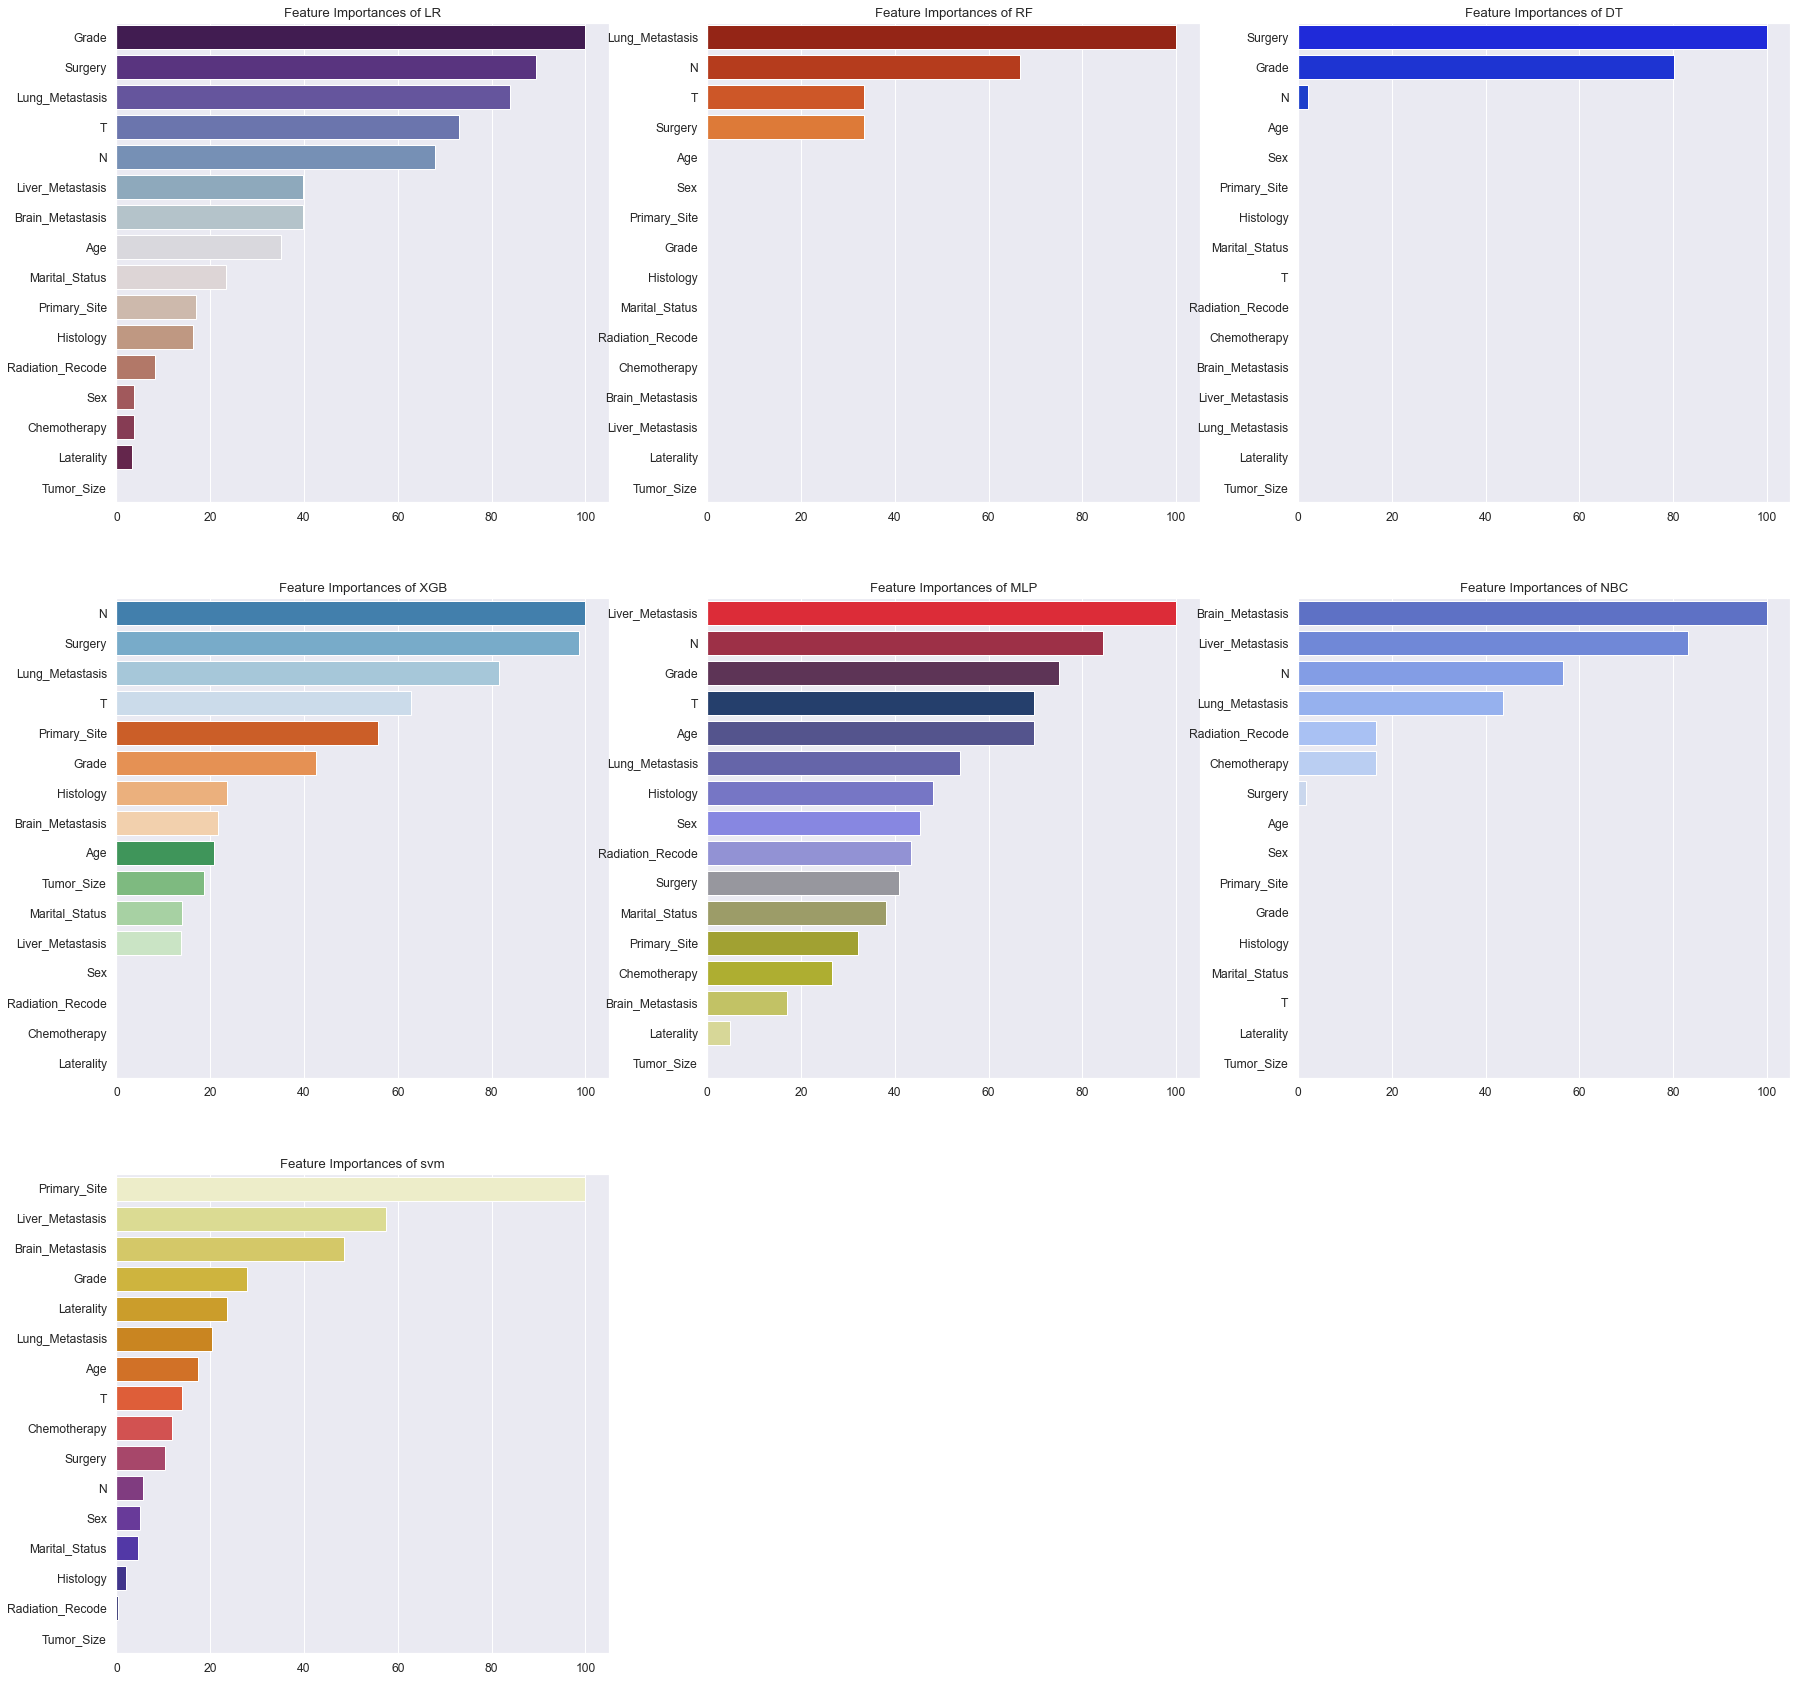

In [64]:
fig = plt.gcf()
fig.set_size_inches(30,30)
from sklearn import preprocessing
min_max_scaler1 = preprocessing.MinMaxScaler(feature_range = (0,100),copy = 1)
plt.subplot(3,3,1)
tmp=pd.DataFrame([abs(lr.coef_[0]),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='twilight_shifted')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of LR')
plt.subplot(3,3,2)
tmp=pd.DataFrame([abs(rf.feature_importances_),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='turbo_r')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of RF')
plt.subplot(3,3,3)
tmp=pd.DataFrame([abs(DecisionTree.feature_importances_),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='winter')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of DT')
plt.subplot(3,3,4)
tmp=pd.DataFrame([abs(xgb.feature_importances_),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='tab20c')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of XGB')
plt.subplot(3,3,5)
tmp=pd.DataFrame([abs(np.dot(mlp.coefs_[0],mlp.coefs_[1]).reshape(1,-1)[0]),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='gist_stern')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of MLP')
plt.subplot(3,3,6)
# tmp=pd.DataFrame([abs(BNB.coef_[0]),f_top]).T.sort_values(by=0,ascending=False)
tmp=pd.DataFrame([abs(BNB.feature_log_prob_[1, :]),f_top]).T.sort_values(by=0,ascending=False)
# tmp=pd.DataFrame([abs(BNB.sigma_.mean(axis=0)),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='coolwarm')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of NBC')

plt.subplot(3,3,7)
tmp=pd.DataFrame([abs(svm.coef_[0]),f_top]).T.sort_values(by=0,ascending=False)
tmp.columns=['value','col']
tmp['value']=min_max_scaler1.fit_transform(tmp[['value']])
sns.barplot(x=tmp.value,y=tmp.col,palette='CMRmap_r')
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importances of svm')
plt.savefig('重要性图.png',dpi=600)

## 学习曲线

In [98]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,train_sizes=np.linspace(.05, 1., 20), verbose=0,plot=True):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        # plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        # plt.xlabel("train_size")
        plt.ylabel("score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="train_score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="cv_score")
    
        plt.legend(loc="best")
        plt.ylim(1,0.7)
        plt.draw()
        plt.gca().invert_yaxis()
        # plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

In [121]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
strKFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=2)
# loout = LeaveOneOut()
cv=strKFold

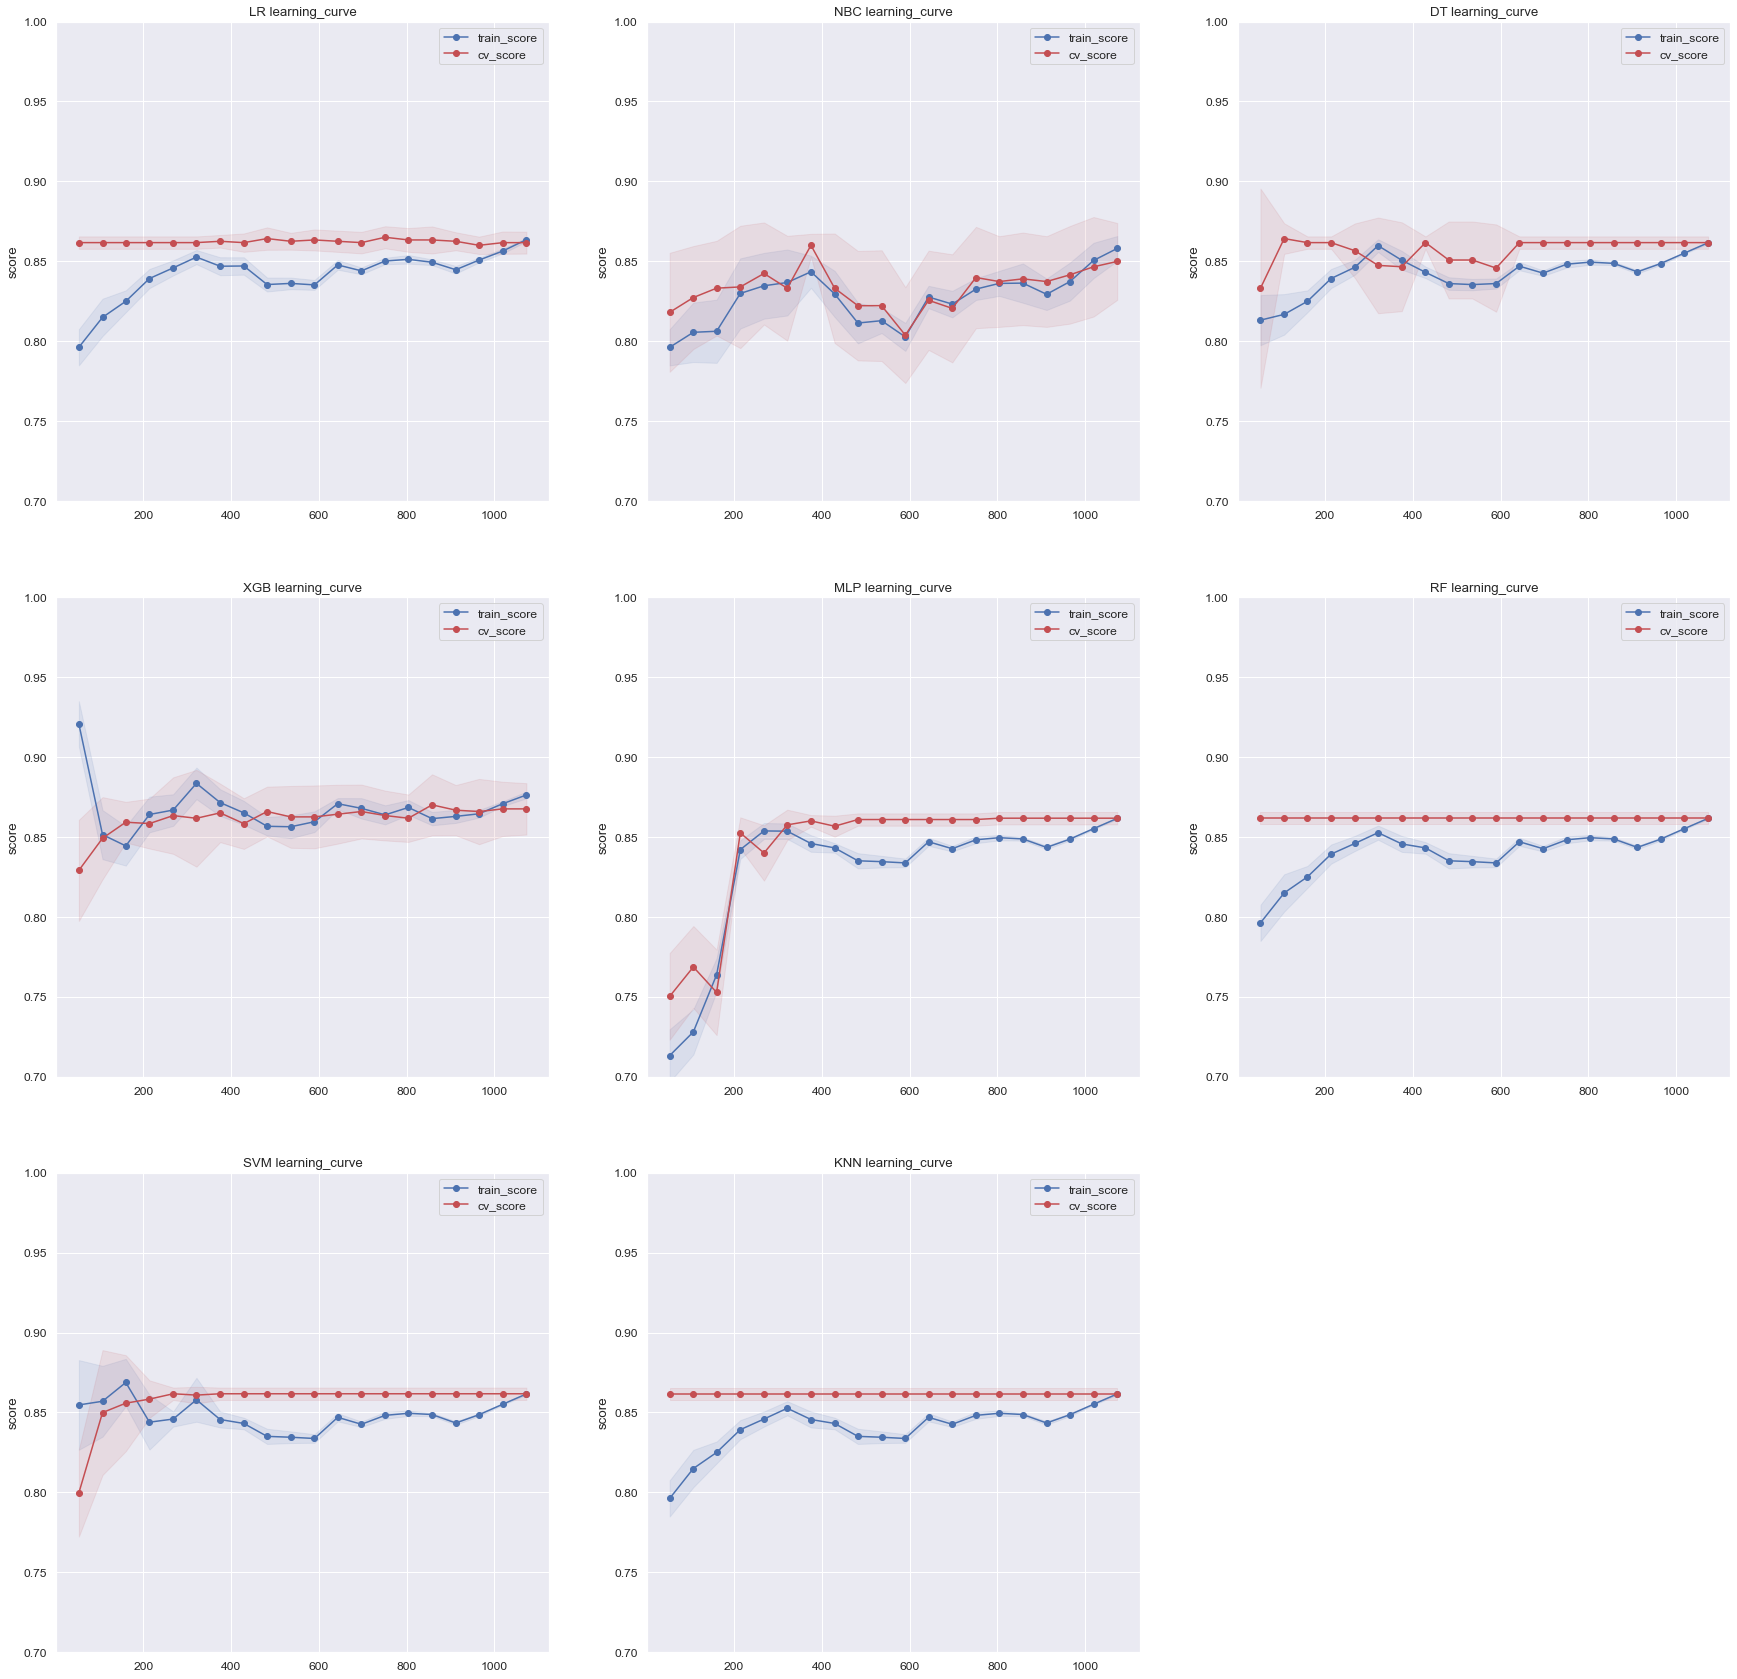

In [122]:
from sklearn.model_selection import learning_curve
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.subplot(3,3,1)
plot_learning_curve(lr, u"LR learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,2)
plot_learning_curve(BNB, u"NBC learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,3)
plot_learning_curve(DecisionTree, u"DT learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,4)
plot_learning_curve(xgb, u"XGB learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,5)
plot_learning_curve(mlp, u"MLP learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,6)
plot_learning_curve(rf, u"RF learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,7)
plot_learning_curve(svm, u"SVM learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.subplot(3,3,8)
plot_learning_curve(knn, u"KNN learning_curve", np.array(train[f_top]), np.array(train['label']),cv=cv)
plt.savefig('learning_curve.png',dpi=600)
plt.show()

## 交叉验证

In [65]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
strKFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
# loout = LeaveOneOut()
cv=strKFold
# cv=loout
result_lr=cross_val_score(lr,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_nbc=cross_val_score(BNB,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_rf=cross_val_score(rf,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_xgb=cross_val_score(xgb,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_mlp=cross_val_score(mlp,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_dt=cross_val_score(DecisionTree,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_svm=cross_val_score(svm,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)
result_knn=cross_val_score(knn,train[f_top],train['label'],scoring='roc_auc',cv=cv,n_jobs=-1)

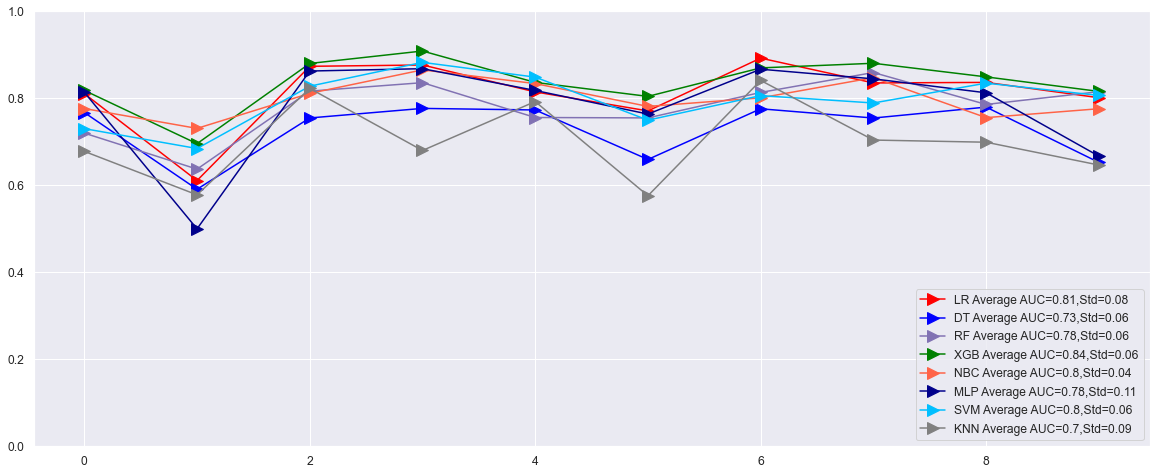

In [66]:
fig = plt.gcf()
fig.set_size_inches(20,8)
n=10
plt.plot(range(n),result_lr, marker=">", ms=12,label='LR Average AUC=%s,Std=%s'%(round(result_lr.mean(),2),round(result_lr.std(),2)),color='red')
plt.plot(range(n),result_dt, marker=">", ms=12,label='DT Average AUC=%s,Std=%s'%(round(result_dt.mean(),2),round(result_dt.std(),2)),color='blue')
plt.plot(range(n),result_rf, marker=">", ms=12,label='RF Average AUC=%s,Std=%s'%(round(result_rf.mean(),2),round(result_rf.std(),2)),color='m')
plt.plot(range(n),result_xgb, marker=">", ms=12,label='XGB Average AUC=%s,Std=%s'%(round(result_xgb.mean(),2),round(result_xgb.std(),2)),color='green')
plt.plot(range(n),result_nbc, marker=">", ms=12,label='NBC Average AUC=%s,Std=%s'%(round(result_nbc.mean(),2),round(result_nbc.std(),2)),color='tomato')
plt.plot(range(n),result_mlp, marker=">", ms=12,label='MLP Average AUC=%s,Std=%s'%(round(result_mlp.mean(),2),round(result_mlp.std(),2)),color='darkblue')
plt.plot(range(n),result_svm, marker=">", ms=12,label='SVM Average AUC=%s,Std=%s'%(round(result_svm.mean(),2),round(result_svm.std(),2)),color='deepskyblue')
plt.plot(range(n),result_knn, marker=">", ms=12,label='KNN Average AUC=%s,Std=%s'%(round(result_knn.mean(),2),round(result_knn.std(),2)),color='gray')
plt.legend(loc=4)
plt.ylim(0,1)
plt.savefig('交叉验证.png',dpi=600)

## ROC曲线

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

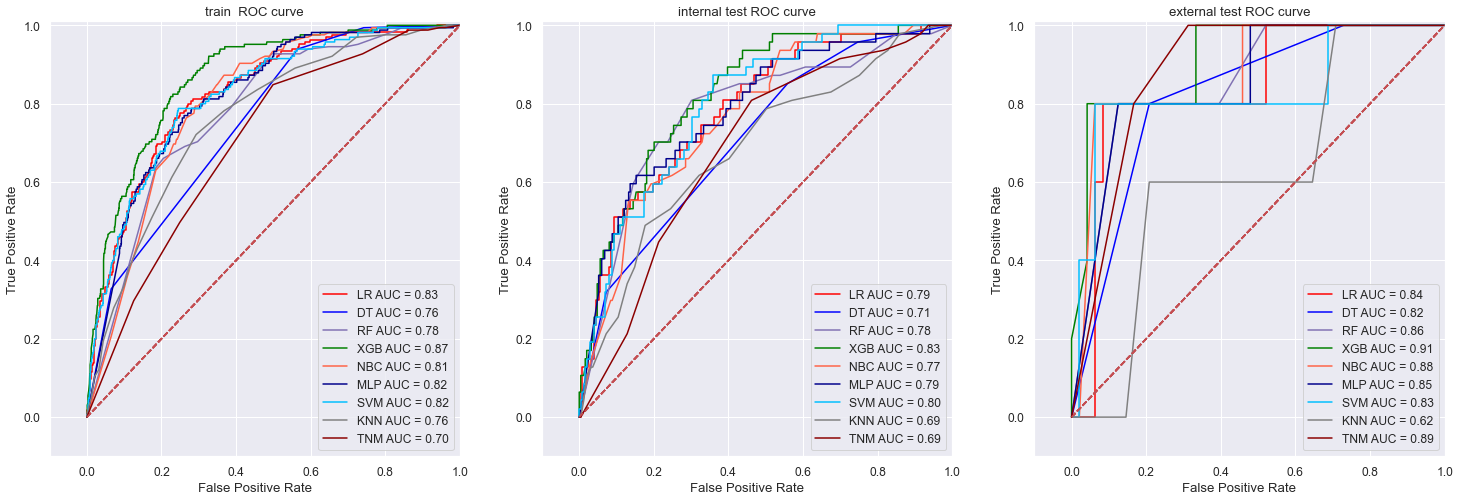

In [67]:
plt.style.use('tableau-colorblind10')
def plot_roc(k,y_pred_undersample_score,labels_test,classifiers,color,title):
    fpr, tpr, thresholds = metrics.roc_curve(labels_test.values.ravel(),y_pred_undersample_score)
    roc_auc = metrics.auc(fpr,tpr)
    plt.figure(figsize=(20,16))
    plt.figure(k)
    plt.title(title)
    plt.plot(fpr, tpr, 'b',color=color,label='%s AUC = %0.2f'% (classifiers,roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
fig = plt.gcf()
fig.set_size_inches(25,8)
plt.subplot(1,3,1)
plot_roc(1,lr.predict_proba(train[f_top])[:,1],train['label'],'LR','red','train  ROC curve')
plot_roc(1,DecisionTree.predict_proba(train[f_top])[:,1],train['label'],'DT','blue','train  ROC curve')
plot_roc(1,rf.predict_proba(train[f_top])[:,1],train['label'],'RF','m','train  ROC curve')
plot_roc(1,xgb.predict_proba(train[f_top])[:,1],train['label'],'XGB','green','train  ROC curve')
plot_roc(1,BNB.predict_proba(train[f_top])[:,1],train['label'],'NBC','tomato','train  ROC curve')
plot_roc(1,mlp.predict_proba(train[f_top])[:,1],train['label'],'MLP','darkblue','train  ROC curve')
plot_roc(1,svm.predict_proba(train[f_top])[:,1],train['label'],'SVM','deepskyblue','train  ROC curve')
plot_roc(1,knn.predict_proba(train[f_top])[:,1],train['label'],'KNN','gray','train  ROC curve')
plot_roc(1,train['TNM'],train['label'],'TNM','darkred','train  ROC curve')

plt.subplot(1,3,2)
plot_roc(1,lr.predict_proba(valid[f_top])[:,1],valid['label'],'LR','red','internal test ROC curve')
plot_roc(1,DecisionTree.predict_proba(valid[f_top])[:,1],valid['label'],'DT','blue','internal test ROC curve')
plot_roc(1,rf.predict_proba(valid[f_top])[:,1],valid['label'],'RF','m','internal test ROC curve')
plot_roc(1,xgb.predict_proba(valid[f_top])[:,1],valid['label'],'XGB','green','internal test ROC curve')
plot_roc(1,BNB.predict_proba(valid[f_top])[:,1],valid['label'],'NBC','tomato','internal test ROC curve')
plot_roc(1,mlp.predict_proba(valid[f_top])[:,1],valid['label'],'MLP','darkblue','internal test ROC curve')
plot_roc(1,svm.predict_proba(valid[f_top])[:,1],valid['label'],'SVM','deepskyblue','internal test ROC curve')
plot_roc(1,knn.predict_proba(valid[f_top])[:,1],valid['label'],'KNN','gray','internal test ROC curve')
plot_roc(1,valid['TNM'],valid['label'],'TNM','darkred','internal test ROC curve')

plt.subplot(1,3,3)
plot_roc(1,lr.predict_proba(test[f_top])[:,1],test['label'],'LR','red','external test ROC curve')
plot_roc(1,DecisionTree.predict_proba(test[f_top])[:,1],test['label'],'DT','blue','external test ROC curve')
plot_roc(1,rf.predict_proba(test[f_top])[:,1],test['label'],'RF','m','external test ROC curve')
plot_roc(1,xgb.predict_proba(test[f_top])[:,1],test['label'],'XGB','green','external test ROC curve')
plot_roc(1,BNB.predict_proba(test[f_top])[:,1],test['label'],'NBC','tomato','external test ROC curve')
plot_roc(1,mlp.predict_proba(test[f_top])[:,1],test['label'],'MLP','darkblue','external test ROC curve')
plot_roc(1,svm.predict_proba(test[f_top])[:,1],test['label'],'SVM','deepskyblue','external test ROC curve')
plot_roc(1,knn.predict_proba(test[f_top])[:,1],test['label'],'KNN','gray','external test ROC curve')
plot_roc(1,test['TNM'],test['label'],'TNM','darkred','external test ROC curve')

plt.savefig('ROC.png',dpi=600)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

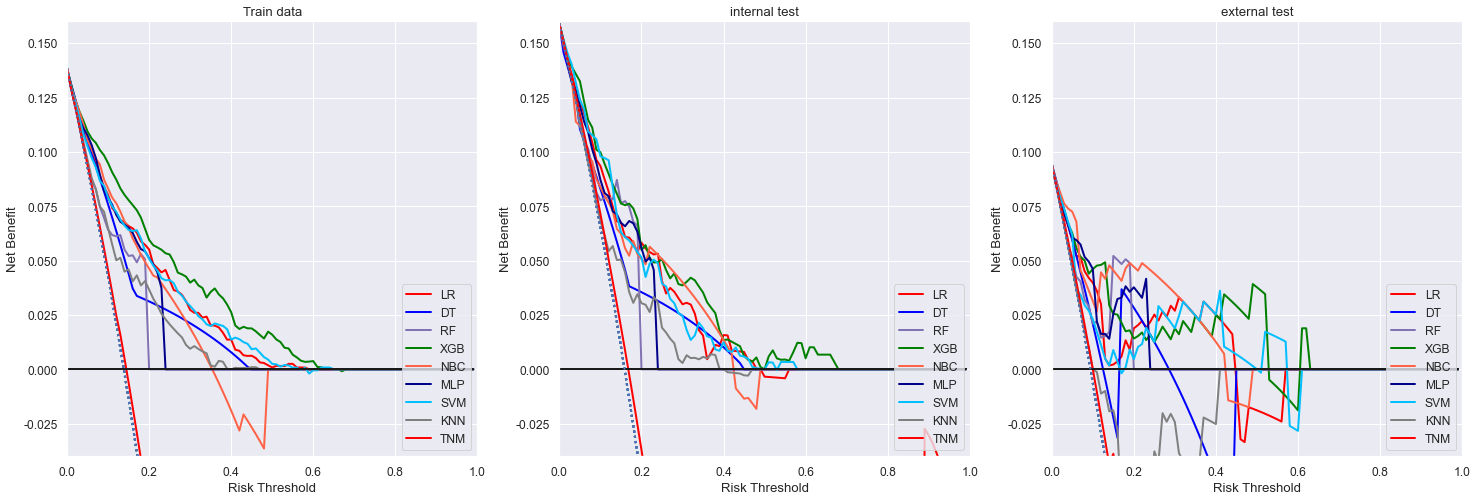

In [68]:
from sklearn import preprocessing
def dac(pred_ans,train,f_top,k,color,name,title):
    Y = train['label']
    a=train['label'].value_counts()[0]
    b=train['label'].value_counts()[1]
    pt_arr = []
    net_bnf_arr = []
    jiduan = []
    pred_ans = pred_ans.ravel()
    for i in range(0,100,1):
        pt = i /100
        #compiute TP FP
        pred_ans_clip = np.zeros(pred_ans.shape[0])
        for j in range(pred_ans.shape[0]):
            if pred_ans[j] >= pt:
                pred_ans_clip[j] = 1
            else:
                pred_ans_clip[j] = 0
        TP = np.sum((Y) * np.round(pred_ans_clip))
        FP = np.sum((1 - Y) * np.round(pred_ans_clip))
        net_bnf = ( TP-(FP * pt/(1-pt)) )/Y.shape[0]
        # print('pt {}, TP {}, FP {}, net_bf {}'.format(pt,TP,FP,net_bnf))
        pt_arr.append(pt)
        net_bnf_arr.append(net_bnf)
        jiduan.append((b-a*pt/(1-pt))/(a+b))
    plt.figure(figsize=(12,8))
    plt.figure(k)
    plt.plot(pt_arr, net_bnf_arr, color=color, lw=2,label=name)
    plt.legend(loc=4)
    plt.plot(pt_arr, np.zeros(len(pt_arr)), color='k', lw=2)
    # ,label='None'
    # data_test = data_test.ravel()
    pt_np = np.array(pt_arr)
    # jiduan = (np.sum(data_test)-(len(data_test)-np.sum(data_test)*pt_np)/(1-pt_np))/len(data_test)
    plt.plot(pt_arr, jiduan , color='b', lw=2, linestyle='dotted')
    # ,label='ALL'
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.04, 0.16])
    plt.xlabel('Risk Threshold')
    plt.ylabel('Net Benefit')
    plt.title(title)

    # plt.savefig("DCA.png")
    # plt.show()
fig = plt.gcf()
fig.set_size_inches(25,8)
plt.subplot(1,3,1)
dac(lr.predict_proba(train[f_top])[:,1],train,f_top,1,'red','LR','Train data')
dac(DecisionTree.predict_proba(train[f_top])[:,1],train,f_top,1,'blue','DT','Train data')
dac(rf.predict_proba(train[f_top])[:,1],train,f_top,1,'m','RF','Train data')
dac(xgb.predict_proba(train[f_top])[:,1],train,f_top,1,'green','XGB','Train data')
dac(BNB.predict_proba(train[f_top])[:,1],train,f_top,1,'tomato','NBC','Train data')
dac(mlp.predict_proba(train[f_top])[:,1],train,f_top,1,'darkblue','MLP','Train data')
dac(svm.predict_proba(train[f_top])[:,1],train,f_top,1,'deepskyblue','SVM','Train data')
dac(knn.predict_proba(train[f_top])[:,1],train,f_top,1,'gray','KNN','Train data')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
dac(m1.fit_transform(train[['TNM']]).reshape(1,-1)[0],train,f_top,1,'red','TNM','Train data')
# m2 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
# dac(m2.fit_transform(train[['T_stage']]).reshape(1,-1)[0],train,f_top,1,'m','T_stage','Train data')
# m3 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
# dac(m3.fit_transform(train[['N_stage']]).reshape(1,-1)[0],train,f_top,1,'m','N_stage','Train data')

plt.subplot(1,3,2)
dac(lr.predict_proba(valid[f_top])[:,1],valid,f_top,1,'red','LR','internal test')
dac(DecisionTree.predict_proba(valid[f_top])[:,1],valid,f_top,1,'blue','DT','internal test')
dac(rf.predict_proba(valid[f_top])[:,1],valid,f_top,1,'m','RF','internal test')
dac(xgb.predict_proba(valid[f_top])[:,1],valid,f_top,1,'green','XGB','internal test')
dac(BNB.predict_proba(valid[f_top])[:,1],valid,f_top,1,'tomato','NBC','internal test')
dac(mlp.predict_proba(valid[f_top])[:,1],valid,f_top,1,'darkblue','MLP','internal test')
dac(svm.predict_proba(valid[f_top])[:,1],valid,f_top,1,'deepskyblue','SVM','internal test')
dac(knn.predict_proba(valid[f_top])[:,1],valid,f_top,1,'gray','KNN','internal test')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
dac(m1.fit_transform(valid[['TNM']]).reshape(1,-1)[0],valid,f_top,1,'red','TNM','internal test')

plt.subplot(1,3,3)
dac(lr.predict_proba(test[f_top])[:,1],test,f_top,1,'red','LR','external test')
dac(DecisionTree.predict_proba(test[f_top])[:,1],test,f_top,1,'blue','DT','external test')
dac(rf.predict_proba(test[f_top])[:,1],test,f_top,1,'m','RF','external test')
dac(xgb.predict_proba(test[f_top])[:,1],test,f_top,1,'green','XGB','external test')
dac(BNB.predict_proba(test[f_top])[:,1],test,f_top,1,'tomato','NBC','external test')
dac(mlp.predict_proba(test[f_top])[:,1],test,f_top,1,'darkblue','MLP','external test')
dac(svm.predict_proba(test[f_top])[:,1],test,f_top,1,'deepskyblue','SVM','external test')
dac(knn.predict_proba(test[f_top])[:,1],test,f_top,1,'gray','KNN','external test')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
dac(m1.fit_transform(test[['TNM']]).reshape(1,-1)[0],test,f_top,1,'red','TNM','external test')

plt.savefig('DCA.png',dpi=600)

In [69]:
def Optimal_threshold(y_pred,labels_test):
    a=y_pred.unique()
    a.sort()
    results = pd.DataFrame(index = range(len(a)), columns = ['thresholds','f1-score'])
    j=0
    for i in a:
        pred_t=y_pred >= i
        pred_t=pred_t
        results.iloc[j,0]=i
        results.iloc[j,1]=metrics.f1_score(labels_test.values.ravel(),pred_t)
        j += 1
    results['f1-score']=results['f1-score'].astype('float64')
    optimal_threshold = results.loc[results['f1-score'].idxmax()]['thresholds']
    return results,optimal_threshold
results,optimal_threshold=Optimal_threshold(valid['TNM'],valid['label'])
results.sort_values(by='f1-score')

,thresholds,f1-score
9,9,0.000000
8,8,0.224719
0,0,0.274052
2,2,0.286604
1,1,0.287462
3,3,0.290323
4,4,0.299320
5,5,0.325758
7,7,0.347107
6,6,0.380000


## PR曲线

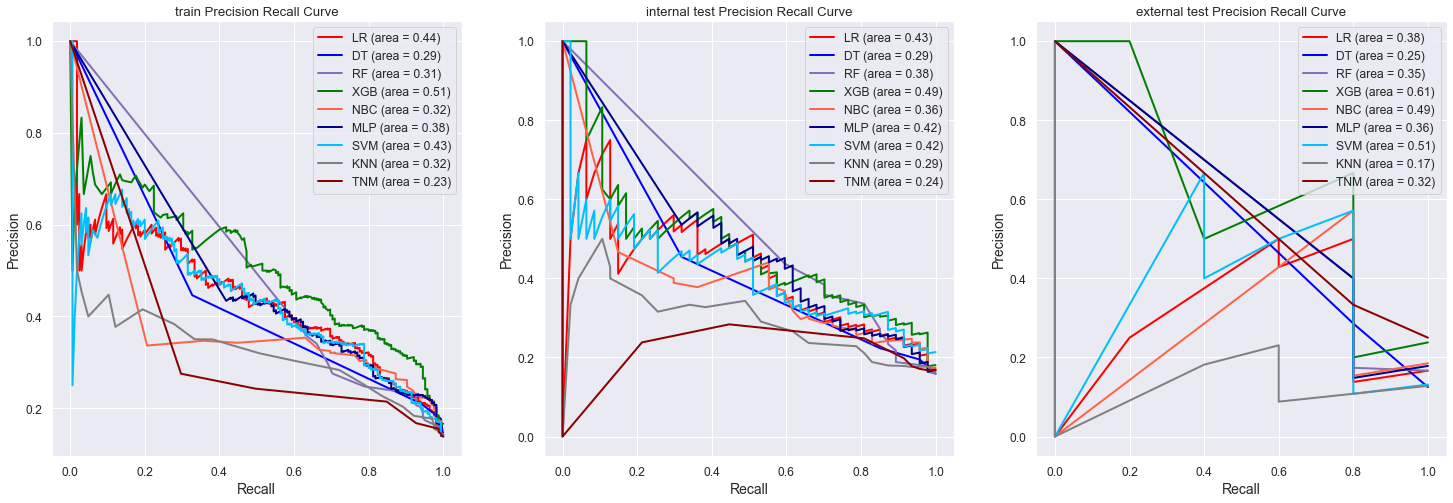

In [70]:
from sklearn.metrics import precision_recall_curve, average_precision_score
def ro_curve(k,y_pred, y_label, method_name,color,title):
    y_label = np.array(y_label)
    y_pred = np.array(y_pred)    
    lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred)    
    plt.figure(k)
    plt.plot(lr_recall, lr_precision, lw = 2, label= method_name + ' (area = %0.2f)' % average_precision_score(y_label, y_pred),color=color)
    fontsize = 14
    plt.xlabel('Recall', fontsize = fontsize)
    plt.ylabel('Precision', fontsize = fontsize)
    plt.title(title)
    plt.legend()
fig = plt.gcf()
fig.set_size_inches(25,8)
plt.subplot(1,3,1)
ro_curve(1,lr.predict_proba(train[f_top])[:,1],train['label'],'LR','red','train Precision Recall Curve')
ro_curve(1,DecisionTree.predict_proba(train[f_top])[:,1],train['label'],'DT','blue','train Precision Recall Curve')
ro_curve(1,rf.predict_proba(train[f_top])[:,1],train['label'],'RF','m','train Precision Recall Curve')
ro_curve(1,xgb.predict_proba(train[f_top])[:,1],train['label'],'XGB','green','train Precision Recall Curve')
ro_curve(1,BNB.predict_proba(train[f_top])[:,1],train['label'],'NBC','tomato','train Precision Recall Curve')
ro_curve(1,mlp.predict_proba(train[f_top])[:,1],train['label'],'MLP','darkblue','train Precision Recall Curve')
ro_curve(1,svm.predict_proba(train[f_top])[:,1],train['label'],'SVM','deepskyblue','train Precision Recall Curve')
ro_curve(1,knn.predict_proba(train[f_top])[:,1],train['label'],'KNN','gray','train Precision Recall Curve')
ro_curve(1,train['TNM'],train['label'],'TNM','darkred','train Precision Recall Curve')
plt.subplot(1,3,2)
ro_curve(1,lr.predict_proba(valid[f_top])[:,1],valid['label'],'LR','red','internal test Precision Recall Curve')
ro_curve(1,DecisionTree.predict_proba(valid[f_top])[:,1],valid['label'],'DT','blue','internal test Precision Recall Curve')
ro_curve(1,rf.predict_proba(valid[f_top])[:,1],valid['label'],'RF','m','internal test Precision Recall Curve')
ro_curve(1,xgb.predict_proba(valid[f_top])[:,1],valid['label'],'XGB','green','internal test Precision Recall Curve')
ro_curve(1,BNB.predict_proba(valid[f_top])[:,1],valid['label'],'NBC','tomato','internal test Precision Recall Curve')
ro_curve(1,mlp.predict_proba(valid[f_top])[:,1],valid['label'],'MLP','darkblue','internal test Precision Recall Curve')
ro_curve(1,svm.predict_proba(valid[f_top])[:,1],valid['label'],'SVM','deepskyblue','internal test Precision Recall Curve')
ro_curve(1,knn.predict_proba(valid[f_top])[:,1],valid['label'],'KNN','gray','internal test Precision Recall Curve')
ro_curve(1,valid['TNM'],valid['label'],'TNM','darkred','internal test Precision Recall Curve')
plt.subplot(1,3,3)
ro_curve(1,lr.predict_proba(test[f_top])[:,1],test['label'],'LR','red','external test Precision Recall Curve')
ro_curve(1,DecisionTree.predict_proba(test[f_top])[:,1],test['label'],'DT','blue','external test Precision Recall Curve')
ro_curve(1,rf.predict_proba(test[f_top])[:,1],test['label'],'RF','m','external test Precision Recall Curve')
ro_curve(1,xgb.predict_proba(test[f_top])[:,1],test['label'],'XGB','green','external test Precision Recall Curve')
ro_curve(1,BNB.predict_proba(test[f_top])[:,1],test['label'],'NBC','tomato','external test Precision Recall Curve')
ro_curve(1,mlp.predict_proba(test[f_top])[:,1],test['label'],'MLP','darkblue','external test Precision Recall Curve')
ro_curve(1,svm.predict_proba(test[f_top])[:,1],test['label'],'SVM','deepskyblue','external test Precision Recall Curve')
ro_curve(1,knn.predict_proba(test[f_top])[:,1],test['label'],'KNN','gray','external test Precision Recall Curve')
ro_curve(1,test['TNM'],test['label'],'TNM','darkred','external test Precision Recall Curve')
plt.savefig('PR曲线.png',dpi=600)

## 校准曲线

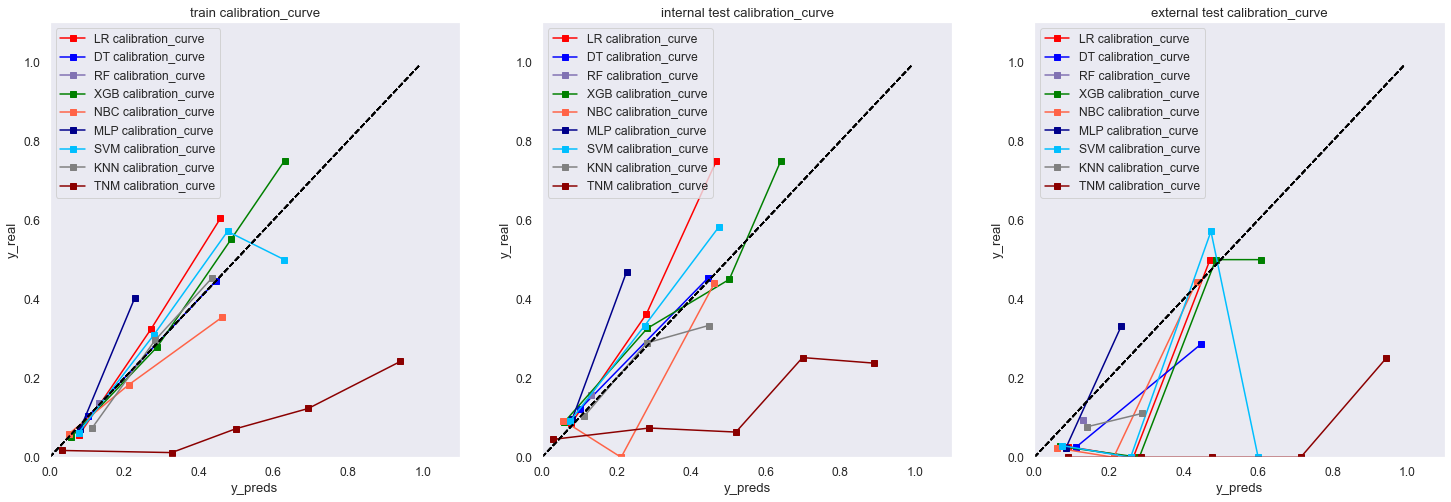

In [71]:
plt.rcParams["axes.grid"] = False
from sklearn.calibration import calibration_curve
def calibration_curve_1(k,y_pred,y_true,method_name,color,title):
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=5)
    plt.figure(k)
    plt.plot(prob_pred,prob_true,color=color,label='%s calibration_curve'%method_name,marker='s')
    plt.plot([i/100 for i in range(0,100)],[i/100 for i in range(0,100)],color='black',linestyle='--')
    plt.xlim(0,1.1,0.2)
    plt.ylim(0,1.1,0.2)
    plt.xlabel('y_preds')
    plt.ylabel('y_real')
    plt.title(title)
    plt.legend()
fig = plt.gcf()
fig.set_size_inches(25,8)
plt.subplot(1,3,1)
calibration_curve_1(1,lr.predict_proba(train[f_top])[:,1],train['label'],'LR','red','train calibration_curve')
calibration_curve_1(1,DecisionTree.predict_proba(train[f_top])[:,1],train['label'],'DT','blue','train calibration_curve')
calibration_curve_1(1,rf.predict_proba(train[f_top])[:,1],train['label'],'RF','m','train calibration_curve')
calibration_curve_1(1,xgb.predict_proba(train[f_top])[:,1],train['label'],'XGB','green','train calibration_curve')
calibration_curve_1(1,BNB.predict_proba(train[f_top])[:,1],train['label'],'NBC','tomato','train calibration_curve')
calibration_curve_1(1,mlp.predict_proba(train[f_top])[:,1],train['label'],'MLP','darkblue','train calibration_curve')
calibration_curve_1(1,svm.predict_proba(train[f_top])[:,1],train['label'],'SVM','deepskyblue','train calibration_curve')
calibration_curve_1(1,knn.predict_proba(train[f_top])[:,1],train['label'],'KNN','gray','train calibration_curve')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
calibration_curve_1(1,m1.fit_transform(train[['TNM']]).reshape(1,-1)[0],train['label'],'TNM','darkred','train calibration_curve')
plt.subplot(1,3,2)
calibration_curve_1(1,lr.predict_proba(valid[f_top])[:,1],valid['label'],'LR','red','internal test calibration_curve')
calibration_curve_1(1,DecisionTree.predict_proba(valid[f_top])[:,1],valid['label'],'DT','blue','internal test calibration_curve')
calibration_curve_1(1,rf.predict_proba(valid[f_top])[:,1],valid['label'],'RF','m','internal test calibration_curve')
calibration_curve_1(1,xgb.predict_proba(valid[f_top])[:,1],valid['label'],'XGB','green','internal test calibration_curve')
calibration_curve_1(1,BNB.predict_proba(valid[f_top])[:,1],valid['label'],'NBC','tomato','internal test calibration_curve')
calibration_curve_1(1,mlp.predict_proba(valid[f_top])[:,1],valid['label'],'MLP','darkblue','internal test calibration_curve')
calibration_curve_1(1,svm.predict_proba(valid[f_top])[:,1],valid['label'],'SVM','deepskyblue','internal test calibration_curve')
calibration_curve_1(1,knn.predict_proba(valid[f_top])[:,1],valid['label'],'KNN','gray','internal test calibration_curve')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
calibration_curve_1(1,m1.fit_transform(valid[['TNM']]).reshape(1,-1)[0],valid['label'],'TNM','darkred','internal test calibration_curve')
plt.subplot(1,3,3)
calibration_curve_1(1,lr.predict_proba(test[f_top])[:,1],test['label'],'LR','red','external test calibration_curve')
calibration_curve_1(1,DecisionTree.predict_proba(test[f_top])[:,1],test['label'],'DT','blue','external test calibration_curve')
calibration_curve_1(1,rf.predict_proba(test[f_top])[:,1],test['label'],'RF','m','external test calibration_curve')
calibration_curve_1(1,xgb.predict_proba(test[f_top])[:,1],test['label'],'XGB','green','external test calibration_curve')
calibration_curve_1(1,BNB.predict_proba(test[f_top])[:,1],test['label'],'NBC','tomato','external test calibration_curve')
calibration_curve_1(1,mlp.predict_proba(test[f_top])[:,1],test['label'],'MLP','darkblue','external test calibration_curve')
calibration_curve_1(1,svm.predict_proba(test[f_top])[:,1],test['label'],'SVM','deepskyblue','external test calibration_curve')
calibration_curve_1(1,knn.predict_proba(test[f_top])[:,1],test['label'],'KNN','gray','external test calibration_curve')
m1 = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
calibration_curve_1(1,m1.fit_transform(test[['TNM']]).reshape(1,-1)[0],test['label'],'TNM','darkred','external test calibration_curve')

plt.savefig('校准曲线.png',dpi=600)

## 模型评价

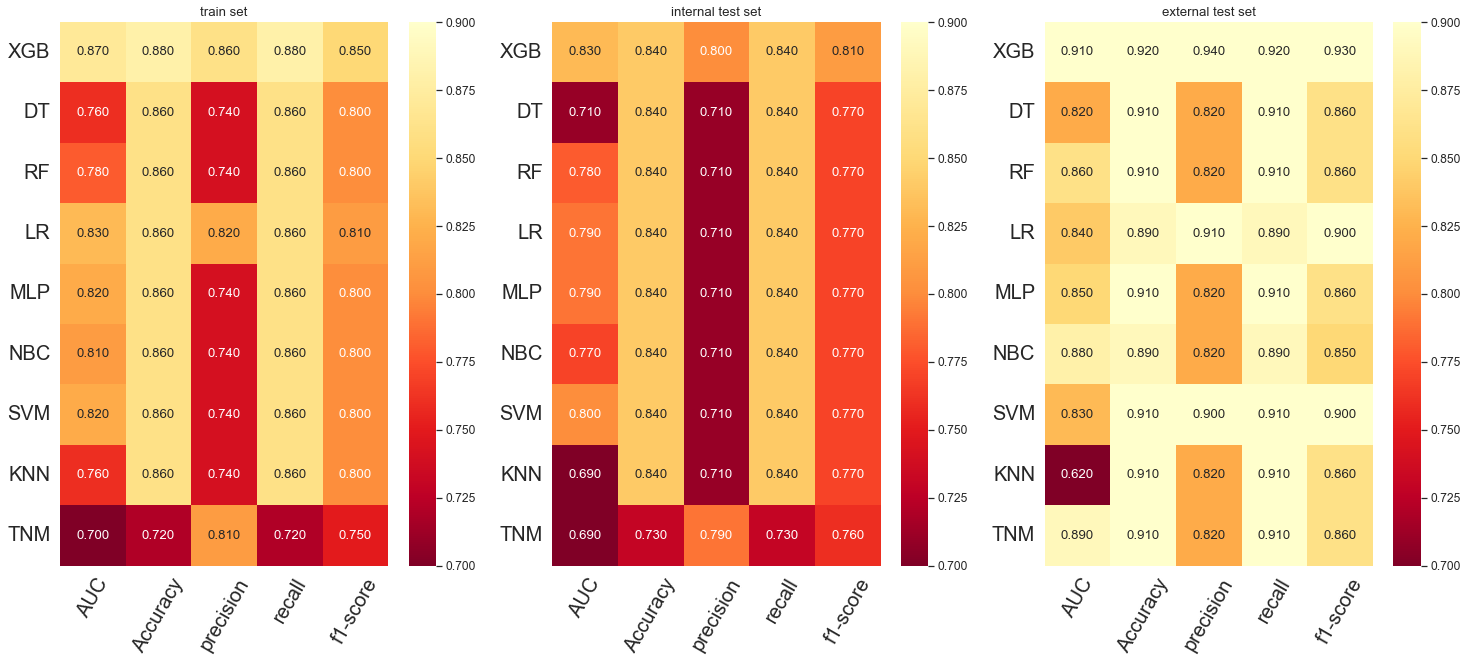

In [72]:
result1=[]
for model in [xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn]:
    result1.append([round(metrics.roc_auc_score(train['label'],model.predict_proba(train[f_top])[:,1]),2)
,round(metrics.accuracy_score(train['label'],model.predict(train[f_top])),2)
,float(metrics.classification_report(train['label'],model.predict(train[f_top])).split('\n')[-2].split('      ')[1].replace(' ',''))
,float(metrics.classification_report(train['label'],model.predict(train[f_top])).split('\n')[-2].split('      ')[2].replace(' ',''))
,float(metrics.classification_report(train['label'],model.predict(train[f_top])).split('\n')[-2].split('      ')[3].replace(' ',''))])
result1=pd.DataFrame(result1,columns=['AUC','Accuracy','precision','recall','f1-score'],index=['XGB','DT','RF','LR','MLP','NBC','SVM','KNN'])

# a=Optimal_threshold(train['FRAX_osteoporosis'],train['osteoporosis'])[1]
# pre_label=[int(i>a) for i in train['FRAX_osteoporosis'].tolist()]
# FRAX_metrics=[round(metrics.roc_auc_score(train['osteoporosis'],train['FRAX_osteoporosis']),2),
# round(metrics.accuracy_score(train['osteoporosis'],pre_label),2),
# float(metrics.classification_report(train['osteoporosis'],pre_label).split('\n')[-2].split('      ')[1].replace(' ','')),
# float(metrics.classification_report(train['osteoporosis'],pre_label).split('\n')[-2].split('      ')[2].replace(' ','')),
# float(metrics.classification_report(train['osteoporosis'],pre_label).split('\n')[-2].split('      ')[3].replace(' ',''))]
# # FRAX_metrics
a=Optimal_threshold(train['TNM'],train['label'])[1]
pre_label=[int(i>a) for i in train['TNM'].tolist()]
OSTA_metrics=[round(metrics.roc_auc_score(train['label'],train['TNM']),2),
round(metrics.accuracy_score(train['label'],pre_label),2),
float(metrics.classification_report(train['label'],pre_label).split('\n')[-2].split('      ')[1].replace(' ','')),
float(metrics.classification_report(train['label'],pre_label).split('\n')[-2].split('      ')[2].replace(' ','')),
float(metrics.classification_report(train['label'],pre_label).split('\n')[-2].split('      ')[3].replace(' ',''))]
# OSTA_metrics
result1=result1.T
# result1['FRAX']=FRAX_metrics
result1['TNM']=OSTA_metrics
result1=result1.T

result2=[]
for model in [xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn]:
    result2.append([round(metrics.roc_auc_score(valid['label'],model.predict_proba(valid[f_top])[:,1]),2)
,round(metrics.accuracy_score(valid['label'],model.predict(valid[f_top])),2)
,float(metrics.classification_report(valid['label'],model.predict(valid[f_top])).split('\n')[-2].split('      ')[1].replace(' ',''))
,float(metrics.classification_report(valid['label'],model.predict(valid[f_top])).split('\n')[-2].split('      ')[2].replace(' ',''))
,float(metrics.classification_report(valid['label'],model.predict(valid[f_top])).split('\n')[-2].split('      ')[3].replace(' ',''))])
result2=pd.DataFrame(result2,columns=['AUC','Accuracy','precision','recall','f1-score'],index=['XGB','DT','RF','LR','MLP','NBC','SVM','KNN'])

# a=Optimal_threshold(valid['FRAX_osteoporosis'],valid['osteoporosis'])[1]
# pre_label=[int(i>a) for i in valid['FRAX_osteoporosis'].tolist()]
# FRAX_metrics=[round(metrics.roc_auc_score(valid['osteoporosis'],valid['FRAX_osteoporosis']),2),
# round(metrics.accuracy_score(valid['osteoporosis'],pre_label),2),
# float(metrics.classification_report(valid['osteoporosis'],pre_label).split('\n')[-2].split('      ')[1].replace(' ','')),
# float(metrics.classification_report(valid['osteoporosis'],pre_label).split('\n')[-2].split('      ')[2].replace(' ','')),
# float(metrics.classification_report(valid['osteoporosis'],pre_label).split('\n')[-2].split('      ')[3].replace(' ',''))]
# # FRAX_metrics
a=Optimal_threshold(valid['TNM'],valid['label'])[1]
pre_label=[int(i>a) for i in valid['TNM'].tolist()]
OSTA_metrics=[round(metrics.roc_auc_score(valid['label'],valid['TNM']),2),
round(metrics.accuracy_score(valid['label'],pre_label),2),
float(metrics.classification_report(valid['label'],pre_label).split('\n')[-2].split('      ')[1].replace(' ','')),
float(metrics.classification_report(valid['label'],pre_label).split('\n')[-2].split('      ')[2].replace(' ','')),
float(metrics.classification_report(valid['label'],pre_label).split('\n')[-2].split('      ')[3].replace(' ',''))]
# OSTA_metrics
result2=result2.T
# result2['MNT_stage']=FRAX_metrics
result2['TNM']=OSTA_metrics
result2=result2.T

result3=[]
for model in [xgb,DecisionTree,rf,lr,mlp,BNB,svm,knn]:
    result3.append([round(metrics.roc_auc_score(test['label'],model.predict_proba(test[f_top])[:,1]),2)
,round(metrics.accuracy_score(test['label'],model.predict_proba(test[f_top])[:,1]>0.45),2)
,float(metrics.classification_report(test['label'],model.predict_proba(test[f_top])[:,1]>0.45).split('\n')[-2].split('      ')[1].replace(' ',''))
,float(metrics.classification_report(test['label'],model.predict_proba(test[f_top])[:,1]>0.45).split('\n')[-2].split('      ')[2].replace(' ',''))
,float(metrics.classification_report(test['label'],model.predict_proba(test[f_top])[:,1]>0.45).split('\n')[-2].split('      ')[3].replace(' ',''))])
result3=pd.DataFrame(result3,columns=['AUC','Accuracy','precision','recall','f1-score'],index=['XGB','DT','RF','LR','MLP','NBC','SVM','KNN'])
a=Optimal_threshold(test['TNM'],test['label'])[1]
pre_label=[int(i>a) for i in test['TNM'].tolist()]
OSTA_metrics=[round(metrics.roc_auc_score(test['label'],test['TNM']),2),
round(metrics.accuracy_score(test['label'],pre_label),2),
float(metrics.classification_report(test['label'],pre_label).split('\n')[-2].split('      ')[1].replace(' ','')),
float(metrics.classification_report(test['label'],pre_label).split('\n')[-2].split('      ')[2].replace(' ','')),
float(metrics.classification_report(test['label'],pre_label).split('\n')[-2].split('      ')[3].replace(' ',''))]
# OSTA_metrics
result3=result3.T
# result2['MNT_stage']=FRAX_metrics
result3['TNM']=OSTA_metrics
result3=result3.T

fig = plt.gcf() # gcf: get current figure调整图形大小
fig.set_size_inches(25,10)
plt.subplot(1,3,1)
sns.heatmap(data=result1,
            vmax=0.9, 
            vmin=0.7,
            cmap='YlOrRd_r',
            annot=True,
            fmt=".3f",
           )
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20,rotation=0)
plt.title('train set')
plt.subplot(1,3,2)
sns.heatmap(data=result2,
            vmax=0.9, 
            vmin=0.7,
            cmap='YlOrRd_r',
            annot=True,
            fmt=".3f",
           )
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20,rotation=0)
plt.title('internal test set')
plt.subplot(1,3,3)
sns.heatmap(data=result3,
            vmax=0.9, 
            vmin=0.7,
            cmap='YlOrRd_r',
            annot=True,
            fmt=".3f",
           )
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20,rotation=0)
plt.title('external test set')
plt.savefig('热力图.png',dpi=600,bbox_inches = 'tight')

In [73]:
# from sklearn.metrics import confusion_matrix
# tn, fp, fn, tp = confusion_matrix(train['osteoporosis'], xgb.predict(train[f_top])).ravel()
# print('sensitivity: ', tp/(tp+fn))
# print('specificity: ', tn/(tn+fp))

## 热力图

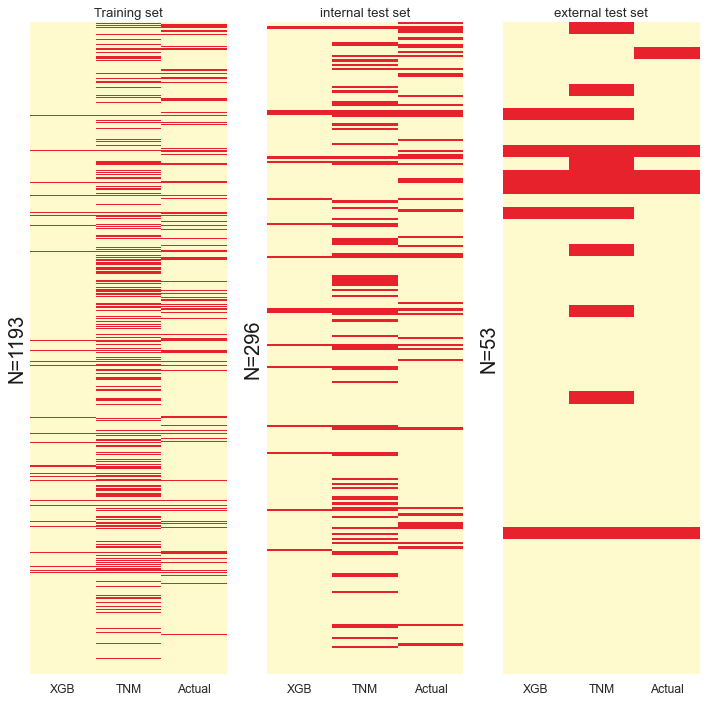

In [74]:
col=['XGB','TNM','Actual']
color=['#FFFACD','#E8222D']
a=Optimal_threshold(train['TNM'],train['label'])[1]
pre_label1=[int(i>a) for i in train['TNM'].tolist()]
# a=Optimal_threshold(-train['OSTA_score'],train['osteoporosis'])[1]
# pre_label2=[int(-i>a) for i in train['OSTA_score'].tolist()]
tmp1=pd.DataFrame([xgb.predict(train[f_top]),
              # DecisionTree.predict(train[f_top]),
              # rf.predict(train[f_top]),
              # lr.predict(train[f_top]),
              # mlp.predict(train[f_top]),
              # BNB.predict(train[f_top]),
              pre_label1,
              # pre_label2,
              train['label']],index=col).T
a=Optimal_threshold(valid['TNM'],valid['label'])[1]
pre_label1=[int(i>a) for i in valid['TNM'].tolist()]
# a=Optimal_threshold(-valid['OSTA_score'],valid['osteoporosis'])[1]
# pre_label2=[int(-i>a) for i in valid['OSTA_score'].tolist()]
tmp2=pd.DataFrame([xgb.predict(valid[f_top]),
              # DecisionTree.predict(valid[f_top]),
              # rf.predict(valid[f_top]),
              # lr.predict(valid[f_top]),
              # mlp.predict(valid[f_top]),
              # BNB.predict(valid[f_top]),
              pre_label1,
              # pre_label2,
              valid['label']],index=col).T

a=Optimal_threshold(test['TNM'],test['label'])[1]-0.1
pre_label1=[int(i>a) for i in test['TNM'].tolist()]
# a=Optimal_threshold(-valid['OSTA_score'],valid['osteoporosis'])[1]
# pre_label2=[int(-i>a) for i in valid['OSTA_score'].tolist()]
tmp3=pd.DataFrame([[int(i) for i in xgb.predict_proba(test[f_top])[:,1]>0.5],
              # DecisionTree.predict(valid[f_top]),
              # rf.predict(valid[f_top]),
              # lr.predict(valid[f_top]),
              # mlp.predict(valid[f_top]),
              # BNB.predict(valid[f_top]),
              pre_label1,
              # pre_label2,
              test['label']],index=col).T
fig = plt.gcf() # gcf: get current figure调整图形大小
fig.set_size_inches(12,12)
plt.subplot(1,3,1)
sns.heatmap(data=tmp1,
            vmax=1, 
            vmin=0,cmap = color,yticklabels=False,cbar=False
            # cmap='YlOrRd_r',
            # annot=True,
            # fmt=".3f",
           )
# sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.title('Training set')
plt.ylabel('N=%s'%train.shape[0],fontsize=20, color='k') #y轴label的文本和字体大小
plt.subplot(1,3,2)
sns.heatmap(data=tmp2,
            vmax=1, 
            vmin=0,cmap = color,yticklabels=False,cbar=False
            # cmap='YlOrRd_r',
            # annot=True,
            # fmt=".3f",
           )
# sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.title('internal test set')
plt.ylabel('N=%s'%valid.shape[0],fontsize=20, color='k') #y轴label的文本和字体大小
plt.subplot(1,3,3)
sns.heatmap(data=tmp3,
            vmax=1, 
            vmin=0,cmap = color,yticklabels=False,cbar=False
            # cmap='YlOrRd_r',
            # annot=True,
            # fmt=".3f",
           )
# sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.title('external test set')
plt.ylabel('N=%s'%test.shape[0],fontsize=20, color='k') #y轴label的文本和字体大小
# sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.savefig('热力图2.png',dpi=600,bbox_inches = 'tight')

In [75]:
import joblib
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
def sava_model_file_pmml(clf,name,features_train,labels_train,feature_top_n):
    model_file=name+'.pkl'
    joblib.dump(clf, model_file)
    #clf = joblib.load(model_file)
    ##pmml
    pipeline = PMMLPipeline([("classifier",clf)])
    pipeline.fit(features_train[feature_top_n],labels_train.values.ravel())
    sklearn2pmml(pipeline, name+'.pmml', with_repr = True)

In [76]:
xgb.fit(train[f_top],train['label'])
sava_model_file_pmml(xgb,'test',train[f_top],train['label'],f_top)

Standard output is empty
Standard error:
java.lang.UnsupportedClassVersionError: org/jpmml/sklearn/Main : Unsupported major.minor version 52.0
	at java.lang.ClassLoader.defineClass1(Native Method)
	at java.lang.ClassLoader.defineClass(Unknown Source)
	at java.security.SecureClassLoader.defineClass(Unknown Source)
	at java.net.URLClassLoader.defineClass(Unknown Source)
	at java.net.URLClassLoader.access$100(Unknown Source)
	at java.net.URLClassLoader$1.run(Unknown Source)
	at java.net.URLClassLoader$1.run(Unknown Source)
	at java.security.AccessController.doPrivileged(Native Method)
	at java.net.URLClassLoader.findClass(Unknown Source)
	at java.lang.ClassLoader.loadClass(Unknown Source)
	at sun.misc.Launcher$AppClassLoader.loadClass(Unknown Source)
	at java.lang.ClassLoader.loadClass(Unknown Source)
	at sun.launcher.LauncherHelper.checkAndLoadMain(Unknown Source)
Exception in thread "main" 


RuntimeError: The JPMML-SkLearn conversion application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams

In [ ]:
a=[str(round(i,3)) for i in list(xgb.predict_proba(train[f_top])[:,1])]
xgb.predict_proba(train[f_top])[:,1].max()

In [ ]:
# a=[str(round(i,3)) for i in list(xgb.predict_proba(train[f_top])[:,1])]
# a.index('0.999')

In [ ]:
dict(train[f_top].loc[62])